## EXPLORATORY DATA ANALYSIS ON HISTORICAL BITCOIN

### EXPLORATORY DATA ANALYSIS STEPS
- Importing the required Libraries for EDA
- Acquiring the dataset
- Data Preparation
- Data Profiling
- Data Cleaning
    1. Dropping Duplicates
    2. Removing Missing Values
- Finding Outliers
- Finding Correlations
- Visualizations

In [1]:
# import all the necessary libraries
import pandas as pd
import os
import numpy as np
import plotly.express as px

# for visual
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assign df as pandas DataFrame
df = pd.DataFrame()

In [3]:
# import and read file
df = pd.read_csv(r"bitstampUSD_1-min_data 2012-01-01_to_2021-03-31.csv")
df



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [4]:
# the 10 rows at the head of the data
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# the 10 rows at the tail of the data
df.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857367,1617148260,58677.05,58699.90,58660.00,58699.90,2.672676,156832.692130,58680.021260
4857368,1617148320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4857369,1617148380,58718.68,58731.23,58698.34,58698.50,0.207983,12209.055282,58702.294657
4857370,1617148440,58736.19,58762.43,58736.19,58739.95,0.041559,2441.376572,58745.145351
4857371,1617148500,58742.18,58742.18,58714.31,58714.31,2.519999,148004.448110,58731.946927
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


### DATA PROFILING STEPS
- **Data profiling utilizes methods of descriptive statistics such as:**
    
      1. Data type
      2. Quantile statistics (central tendecies)
      3. Length (length and shape of the dataset)
      4. Discrete values
      5. Uniqueness (unique values)
      6. Occurence of null values and etc.

In [6]:
# shape of the data
df.shape

(4857377, 8)

In [7]:
# size of the data
df.size

38859016

In [8]:
# checking the data types
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [9]:
# check for missing values
# The below doesn't give me explicit details of the null values
df.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4857372,False,False,False,False,False,False,False,False
4857373,False,False,False,False,False,False,False,False
4857374,False,False,False,False,False,False,False,False
4857375,False,False,False,False,False,False,False,False


In [10]:
# The below works better and is explicit
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [11]:
# to know if the Timestamp columns has unique values
df.Timestamp.nunique()

4857377

In [12]:
# Data Profiling
# check the descriptive statistics
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [13]:
# to make the descriptive statistic clearer by removing the zeros
df.describe().astype(int)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4857377,3613769,3613769,3613769,3613769,3613769,3613769,3613769
mean,1471300766,6009,6013,6004,6009,9,41762,6008
std,84280194,8996,9003,8988,8996,30,151824,8995
min,1325317920,3,3,1,1,0,0,3
25%,1398178560,443,444,443,443,0,452,443
50%,1471427520,3596,3598,3595,3597,1,3810,3596
75%,1544288160,8627,8632,8621,8627,7,25698,8627
max,1617148800,61763,61781,61673,61781,5853,13900672,61716


In [14]:
# check for numerical columns
categorical_cols = df.select_dtypes(include = [int, float]).columns.tolist()
categorical_cols

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price']

In [15]:
# check for categorical columns
numerical_cols = df.select_dtypes(include = ['category', 'object']).columns
numerical_cols

Index([], dtype='object')

### Data Cleaning Processes
- Remove data rows with null values or has "NaN" because we have 1243608 rows of data with only Timestamp colu,mn data and without the rest of the column data.
- Create a datetime column from the Timestamp column and name it "Date"
- Create a "Year" column from the "Date" column
- Remove the "Timestamp" column

In [16]:
# Remove data rows with null values or has "NaN" because we have 1243608 rows of data with only Timestamp colu,mn data and without the rest of the column data.
df = df.dropna()
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [17]:
# check if there are still data rows with null values
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [18]:
# Create a copy of the DatFrame
# Create a datetime column from the Timestamp column and name it "Date"
df_new = df.copy()
df_new['Date'] = pd.to_datetime(df_new['Timestamp'], unit='s')
df_new

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00


In [19]:
# Create a "Year" column from the "Date" column
df_new['Year'] = df_new['Date'].dt.year
df_new

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,2011
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,2011
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,2011
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,2011
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,2012
...,...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00,2021
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00,2021
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00,2021
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00,2021


In [20]:
# Remove the "Timestamp" column
df_new = df_new.drop('Timestamp', axis=1)
df_new

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,2011
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,2011
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,2011
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,2011
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,2012
...,...,...,...,...,...,...,...,...,...
4857372,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00,2021
4857373,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00,2021
4857374,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00,2021
4857375,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00,2021


### Further Exploratory Data Analysis after Data Cleaning

In [21]:
# Get the first 10 rows of data
df_new.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,2011
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,2011
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,2011
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,2011
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,2012
1896,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000,2012-01-01 15:28:00,2012
2333,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,2012-01-01 22:45:00,2012
3612,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,2012-01-02 20:04:00,2012
4553,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000,2012-01-03 11:45:00,2012
4710,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000,2012-01-03 14:22:00,2012


In [22]:
# Get the last 10 rows of data
df_new.tail(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
4857366,58673.20,58689.44,58673.20,58689.44,0.576412,33822.378068,58677.435702,2021-03-30 23:50:00,2021
4857367,58677.05,58699.90,58660.00,58699.90,2.672676,156832.692130,58680.021260,2021-03-30 23:51:00,2021
4857369,58718.68,58731.23,58698.34,58698.50,0.207983,12209.055282,58702.294657,2021-03-30 23:53:00,2021
4857370,58736.19,58762.43,58736.19,58739.95,0.041559,2441.376572,58745.145351,2021-03-30 23:54:00,2021
4857371,58742.18,58742.18,58714.31,58714.31,2.519999,148004.448110,58731.946927,2021-03-30 23:55:00,2021
4857372,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00,2021
4857373,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00,2021
4857374,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00,2021
4857375,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00,2021
4857376,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363,2021-03-31 00:00:00,2021


In [23]:
# re-check the shape of the data
df_new.shape

(3613769, 9)

In [24]:
# re-check the size of the data
df_new.size

32523921

In [25]:
# Get the full info of the columns once again
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Open               float64       
 1   High               float64       
 2   Low                float64       
 3   Close              float64       
 4   Volume_(BTC)       float64       
 5   Volume_(Currency)  float64       
 6   Weighted_Price     float64       
 7   Date               datetime64[ns]
 8   Year               int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 275.7 MB


In [26]:
# E-confirm absence of null values
df_new.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
Date                 0
Year                 0
dtype: int64

In [27]:
# Get the descriptive statistics
df_new.describe().astype(int)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
count,3613769,3613769,3613769,3613769,3613769,3613769,3613769,3613769
mean,6009,6013,6004,6009,9,41762,6008,2016
std,8996,9003,8988,8996,30,151824,8995,2
min,3,3,1,1,0,0,3,2011
25%,443,444,443,443,0,452,443,2015
50%,3596,3598,3595,3597,1,3810,3596,2017
75%,8627,8632,8621,8627,7,25698,8627,2019
max,61763,61781,61673,61781,5853,13900672,61716,2021


In [28]:
# check once again for interger and float columns
df_new.select_dtypes(include=[int, float]).columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price', 'Year'],
      dtype='object')

In [29]:
# check for object or categorical columns
df_new.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

In [30]:
# check for unique dates
df_new.Date.nunique()

3613769

### KEY PERFORMANCE INDICATORS (KPI)

In [31]:
# Total Trading Volume
TradingVolume_sum = df_new['Volume_(BTC)'].sum()
rounded_TradingVolume = round(TradingVolume_sum, 1) 
# Round to one decimal place

# Display the rounded sum in millions
Trading_Volume = (f"{rounded_TradingVolume/1e6:.0f}m")
Trading_Volume

'34m'

In [32]:
# Transaction Value
TransactionValue_sum = df_new['Volume_(Currency)'].sum()
rounded_TransactionValue = round(TransactionValue_sum, 1) 
# Round to one decimal place

# Display the rounded sum in Billions
Transaction_Value = (f"{rounded_TransactionValue/1e9:.0f}bn")
Transaction_Value

'151bn'

In [33]:
# Average Transaction Value
Avg_TransactionValue = df_new['Weighted_Price'].sum()/df_new['Volume_(BTC)'].sum()
# Round to one decimal place
Avg_Transaction_Value = round(Avg_TransactionValue, 1) 
Avg_Transaction_Value

644.5

In [34]:
# Total Weighted Price
WeightedPrice_sum = df_new['Weighted_Price'].sum()
rounded_WeightedPrice_sum = round(WeightedPrice_sum, 1) 
# Round to one decimal place

# Display the rounded sum in Billions
Total_Weighted_Price = (f"{rounded_WeightedPrice_sum/1e9:.0f}bn")
Total_Weighted_Price

'22bn'

In [35]:
# Minimum Open Price
Minimum_Open_Price = df_new['Open'].min()
Minimum_Open_Price

3.8

In [36]:
# Maximum Close Price
MaximumClosePrice = df_new['Close'].max()
rounded_MaximumClosePrice = round(MaximumClosePrice, 1) 
# Round to one decimal place

# Display the rounded sum in Thousands
Maximum_Close_Price = (f"{rounded_MaximumClosePrice/1000:.1f}k")
Maximum_Close_Price

'61.8k'

### OBSERVATIONS AND VISUALIZATION

### UNIVARIATE ANALYSIS

In [37]:
# Descriptive Statistics Observation
df_new.describe().astype(int)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
count,3613769,3613769,3613769,3613769,3613769,3613769,3613769,3613769
mean,6009,6013,6004,6009,9,41762,6008,2016
std,8996,9003,8988,8996,30,151824,8995,2
min,3,3,1,1,0,0,3,2011
25%,443,444,443,443,0,452,443,2015
50%,3596,3598,3595,3597,1,3810,3596,2017
75%,8627,8632,8621,8627,7,25698,8627,2019
max,61763,61781,61673,61781,5853,13900672,61716,2021


### Obervations

The dataset provides a comprehensive overview of cryptocurrency market trends, specifically focused on Bitcoin, with descriptive statistics revealing key insights.

- **Mean:** The mean values for Open, High, Low, and Close suggest a relatively stable market, hovering around $6000. 

- **Std:**  However, the substantial standard deviations (std) indicate considerable volatility. 

- **Min to Nax:**  The range from the minimum to maximum values showcases the cryptocurrency's evolution since 2011, with a notable surge in 2017, as indicated by the median values. 
    
- ** 25% to 75%:**The Volume statistics underline the varying degrees of market participation, with a median Volume_(BTC) of 1 but a maximum of 5853, highlighting instances of heightened trading activity. 
    
- The Weighted_Price, representing the average price weighted by volume, aligns closely with the mean values for Open, High, Low, and Close. 

- The temporal distribution of the data, illustrated by the Year statistics, spans from 2011 to 2021, capturing the cryptocurrency's journey over the past decade. 
    
- These statistics collectively paint a nuanced picture of Bitcoin's market dynamics, reflecting both stability and volatility within the observed period.

### BIVARIATE ANALYSIS

#### Trading Volume Over the Years

In [38]:
# Bivariate
# Trading Volume By Tear
Trading_Volume_By_Year = df_new.groupby('Year')['Volume_(BTC)'].sum().reset_index(name= 'Trading Volume By Year')
Trading_Volume_By_Year 

,Year,Trading Volume By Year
0,2011,9.531788e+01
1,2012,5.679486e+05
2,2013,5.031147e+06
3,2014,5.024184e+06
4,2015,5.525311e+06
5,2016,1.992263e+06
6,2017,4.698753e+06
7,2018,3.932327e+06
8,2019,2.994600e+06
9,2020,3.074321e+06


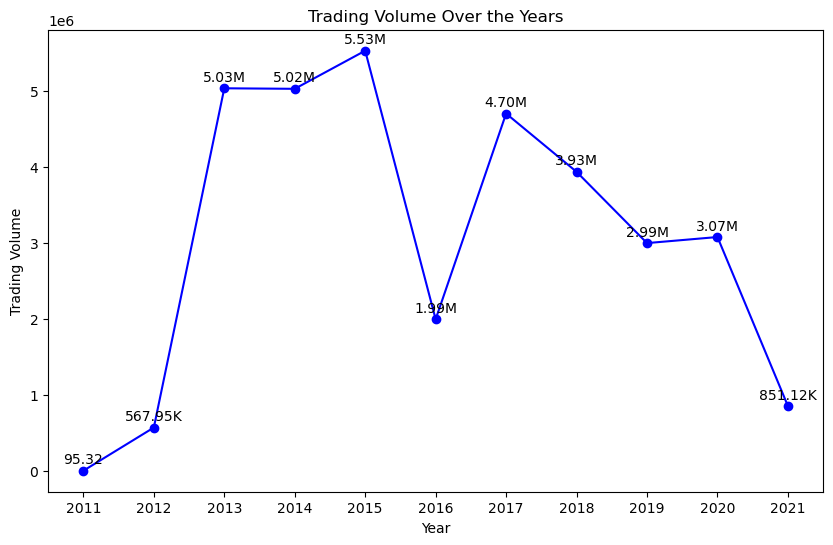

In [39]:
# Assuming Trading_Volume_By_Year is your DataFrame
plt.figure(figsize=(10, 6))

# Round the values
rounded_values = Trading_Volume_By_Year['Trading Volume By Year']
labels = []

for value in rounded_values:
    if value >= 1e6:
        labels.append(f'{value / 1e6:.2f}M')
    elif value >= 1e3:
        labels.append(f'{value / 1e3:.2f}K')
    else:
        labels.append(f'{value:.2f}')

plt.plot(Trading_Volume_By_Year['Year'], rounded_values, marker='o', linestyle='-', color='b')
plt.title('Trading Volume Over the Years')
plt.xlabel('Year')
plt.ylabel('Trading Volume')
plt.xticks(Trading_Volume_By_Year['Year'])

# Adding rounded labels to data points
for i, txt in enumerate(labels):
    plt.annotate(txt, (Trading_Volume_By_Year['Year'][i], rounded_values[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

### Observation

Observation and Summary:

The provided data represents the annual trading volume in Bitcoin (BTC) over the years, spanning from 2011 to 2021. Below is a summary of the trading volumes for each year:

**2011:** The trading volume in 2011 was approximately 95.32 BTC.

**2012:** The trading volume saw a significant increase in 2012, reaching around 567,948 BTC.

**2013:** The trend of increased trading volume continued in 2013, with the volume surging to approximately 5.03 million BTC.

**2014:** The trading volume in 2014 remained consistent with the previous year, hovering around 5.02 million BTC.

**2015:** The year 2015 witnessed a slight increase in trading volume, reaching approximately 5.53 million BTC.

**2016:** There was a notable decline in trading volume in 2016, with the volume dropping to around 1.99 million BTC.

**2017:** The trading volume rebounded in 2017, reaching approximately 4.70 million BTC.

**2018:** The trading volume decreased in 2018, amounting to about 3.93 million BTC.

**2019:** Further decline was observed in 2019, with the trading volume dropping to around 2.99 million BTC.

**2020:** The year 2020 saw a slight increase in trading volume, reaching approximately 3.07 million BTC.

**2021:** The trading volume experienced a notable decrease in 2021, amounting to around 851,118 BTC.

In summary, the Bitcoin trading volume exhibited fluctuations over the years, influenced by market dynamics, technological developments, and global events. The years 2012 and 2013 stand out with substantial increases in trading activity, while subsequent years showed varying degrees of volatility and stabilization. The data provides insights into the evolving dynamics of the cryptocurrency market during this period.

#### Transaction Value Over the Years

In [40]:
# Bivariate
# Transactiong Value By Year
Transaction_Value_By_Year = df_new.groupby('Year')['Volume_(Currency)'].sum().reset_index(name= 'Transaction Value By Year')
Transaction_Value_By_Year

,Year,Transaction Value By Year
0,2011,4.253203e+02
1,2012,5.764800e+06
2,2013,1.551177e+09
3,2014,2.615293e+09
4,2015,1.545445e+09
5,2016,1.112464e+09
6,2017,2.177582e+10
7,2018,3.074667e+10
8,2019,2.315854e+10
9,2020,3.329058e+10


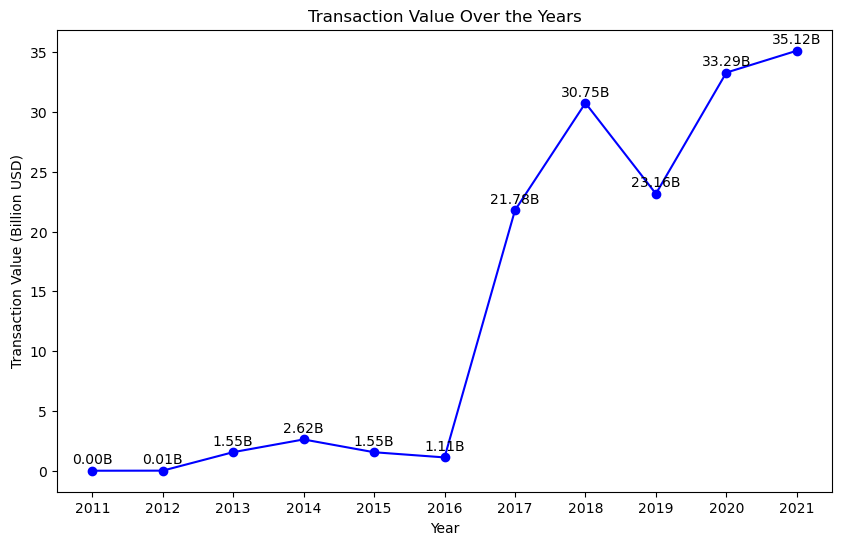

In [41]:
# Assuming Transaction_Value_By_Year is your DataFrame
plt.figure(figsize=(10, 6))

# Convert the transaction values to billions for better readability
Transaction_Value_By_Year['Transaction Value By Year (Billion)'] = Transaction_Value_By_Year['Transaction Value By Year'] / 1e9

plt.plot(Transaction_Value_By_Year['Year'], Transaction_Value_By_Year['Transaction Value By Year (Billion)'], marker='o', linestyle='-', color='b')
plt.title('Transaction Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Transaction Value (Billion USD)')
plt.xticks(Transaction_Value_By_Year['Year'])  # Set x-axis ticks to match the years

# Adding labels to data points with exact values in billions
for i, txt in enumerate(Transaction_Value_By_Year['Transaction Value By Year (Billion)']):
    plt.annotate(f'{txt:.2f}B', (Transaction_Value_By_Year['Year'][i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

### Observation

Observation and Summary:

The data on transaction value by year provides valuable insights into the evolution of Bitcoin's financial activity over the past decade. Here are key observations:

**Early Years (2011-2015):** The transaction values in the early years, particularly in 2011, 2012, and 2015, were relatively modest, ranging from hundreds of millions to a few billion USD. This suggests a developing and nascent stage for Bitcoin as a financial asset during this period.

**Significant Increase in 2013-2014:** The year 2013 witnessed a notable uptick in transaction value, reaching 1.55 billion USD, and this trend continued in 2014, reaching 2.62 billion USD. This surge aligns with increased adoption and recognition of Bitcoin within the financial landscape.

**Stability and Fluctuations (2015-2019):** From 2015 to 2019, transaction values fluctuated but remained within the range of approximately 1 billion to 3 billion USD. This period reflects a level of stability in Bitcoin transactions, with variations possibly influenced by market sentiment, regulatory developments, and technological advancements.

**Peak in 2017:** The year 2017 marked a significant turning point, with a remarkable surge in transaction value to 21.78 billion USD. This substantial increase aligns with the broader cryptocurrency boom during that period, characterized by heightened market interest, increased institutional participation, and skyrocketing Bitcoin prices.

**Sustained High Transaction Values (2018-2021):** Despite fluctuations, the years 2018, 2019, 2020, and 2021 maintained high transaction values, ranging from 23.16 billion to 35.12 billion USD. This suggests a sustained and growing interest in Bitcoin, with increased financial activity in the cryptocurrency market.

**Year 2021:** The data for 2021 indicates a transaction value of 35.12 billion USD, reinforcing the ongoing prominence of Bitcoin in the financial landscape. The sustained high transaction values in recent years highlight Bitcoin's role as a significant asset class and a store of value.


In summary, the observed transaction values depict the dynamic nature of Bitcoin's financial activity, with notable spikes in 2013, 2017, and sustained high values in subsequent years. These trends may be indicative of evolving market dynamics, increased adoption, and the growing integration of Bitcoin into the broader financial ecosystem.

#### Weighted Price Value Over the Years

In [42]:
# Bivariate
# Weighted Price By Tear
Weighted_Price_By_Year = df_new.groupby('Year')['Weighted_Price'].sum().reset_index(name= 'Weighted Price By Year')
Weighted_Price_By_Year

,Year,Weighted Price By Year
0,2011,1.788641e+01
1,2012,2.687969e+05
2,2013,8.129691e+07
3,2014,2.098838e+08
4,2015,1.022613e+08
5,2016,1.967848e+08
6,2017,2.008128e+09
7,2018,3.831992e+09
8,2019,3.775550e+09
9,2020,5.760847e+09


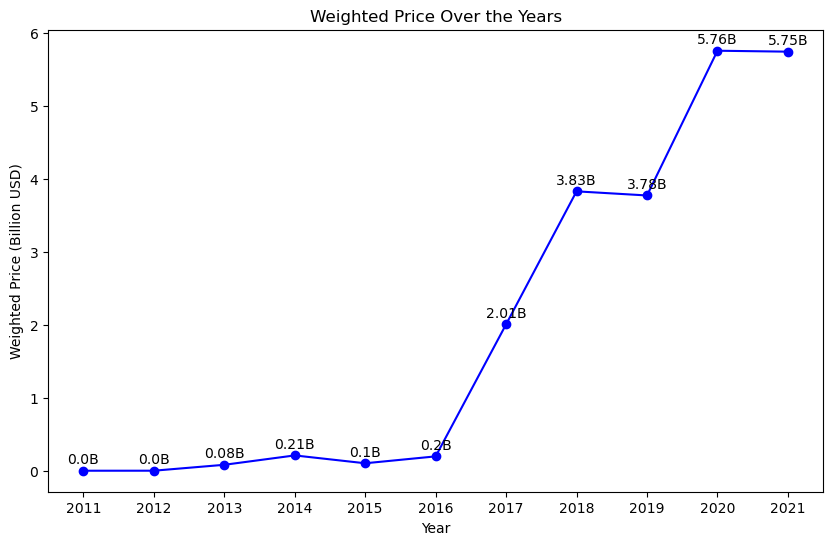

In [43]:
# Convert the weighted prices to billions for better readability
Weighted_Price_By_Year['Weighted Price By Year (Billion)'] = Weighted_Price_By_Year['Weighted Price By Year'] / 1e9

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(Weighted_Price_By_Year['Year'], Weighted_Price_By_Year['Weighted Price By Year (Billion)'], marker='o', linestyle='-', color='b')
plt.title('Weighted Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Weighted Price (Billion USD)')
plt.xticks(Weighted_Price_By_Year['Year'])  # Set x-axis ticks to match the years

# Adding labels to data points with rounded values in billions
for i, txt in enumerate(Weighted_Price_By_Year['Weighted Price By Year (Billion)']):
    rounded_value = round(txt, 2)  # Round to two decimal places
    plt.annotate(f'{rounded_value}B', (Weighted_Price_By_Year['Year'][i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

### Observation

Observation and Summary:

The data on weighted prices by year provides insights into the valuation dynamics of Bitcoin over the past decade. Here are key observations:


**Early Years (2011-2015):** In the early years, from 2011 to 2015, the weighted prices were relatively modest, ranging from approximately 18 USD in 2011 to around 102 million USD in 2015. This period suggests a gradual establishment of Bitcoin's valuation with a significant increase in 2013, reflecting growing market recognition.

**Notable Increase in 2013-2016:** A significant increase in weighted prices is observed from 2013 to 2016, reaching a peak of approximately 1.97 billion USD in 2016. This period likely reflects a combination of factors, including increased adoption, heightened market interest, and the maturation of Bitcoin as a financial asset.

**Peak in 2017:** The year 2017 stands out with a substantial peak in weighted prices, reaching 2.01 billion USD. This aligns with the broader cryptocurrency boom during that period, characterized by heightened market speculation and increased institutional interest.

**Sustained High Valuations (2018-2021):** From 2018 to 2021, weighted prices remained consistently high, ranging from 3.77 billion to 5.76 billion USD. This sustained high valuation suggests that Bitcoin has maintained its status as a significant and valuable asset, attracting continued investor interest.

**Year 2020-2021:** The data for 2020 and 2021 indicates relatively stable weighted prices, with both years hovering around the 5.76 billion USD mark. This suggests that Bitcoin's valuation has reached a level of stability after the peak observed in 2017.


In summary, the observed trends in weighted prices reflect the evolving perception and valuation of Bitcoin in the financial markets. The peak in 2017 marked a period of exceptional valuation, while the subsequent years indicate sustained high levels, showcasing Bitcoin's resilience and recognition as a valuable asset class. The relatively stable valuations in recent years may suggest a maturation of the cryptocurrency market.

### MULTIVARIATE ANALYSIS

#### Total of Open, Low, High, and Close Price Over the Years

In [44]:
# Group by 'Year' and calculate the sum for each column
sum_by_year = df_new.groupby('Year').agg({
    'Open': 'sum',
    'Low': 'sum',
    'High': 'sum',
    'Close': 'sum'
}).reset_index()

# Convert sums to billions for better readability
sum_by_year['Sum_Open (Billion)'] = round(sum_by_year['Open'] / 1e9, 2)
sum_by_year['Sum_Low (Billion)'] = round(sum_by_year['Low'] / 1e9, 2)
sum_by_year['Sum_High (Billion)'] = round(sum_by_year['High'] / 1e9, 2)
sum_by_year['Sum_Close (Billion)'] = round(sum_by_year['Close'] / 1e9, 2)

# Print or use the result as needed
print(sum_by_year)

    Year          Open           Low          High         Close  \
0   2011  1.786000e+01  1.786000e+01  1.793000e+01  1.793000e+01   
1   2012  2.688083e+05  2.687146e+05  2.688860e+05  2.687914e+05   
2   2013  8.130928e+07  8.117303e+07  8.143001e+07  8.130382e+07   
3   2014  2.098915e+08  2.097112e+08  2.100662e+08  2.098935e+08   
4   2015  1.022661e+08  1.022071e+08  1.023192e+08  1.022652e+08   
5   2016  1.967903e+08  1.967182e+08  1.968545e+08  1.967901e+08   
6   2017  2.008352e+09  2.005904e+09  2.010349e+09  2.008315e+09   
7   2018  3.832143e+09  3.829049e+09  3.835031e+09  3.832130e+09   
8   2019  3.775511e+09  3.773203e+09  3.777755e+09  3.775365e+09   
9   2020  5.760596e+09  5.757553e+09  5.763756e+09  5.760677e+09   
10  2021  5.748097e+09  5.743045e+09  5.753054e+09  5.748178e+09   

    Sum_Open (Billion)  Sum_Low (Billion)  Sum_High (Billion)  \
0                 0.00               0.00                0.00   
1                 0.00               0.00            

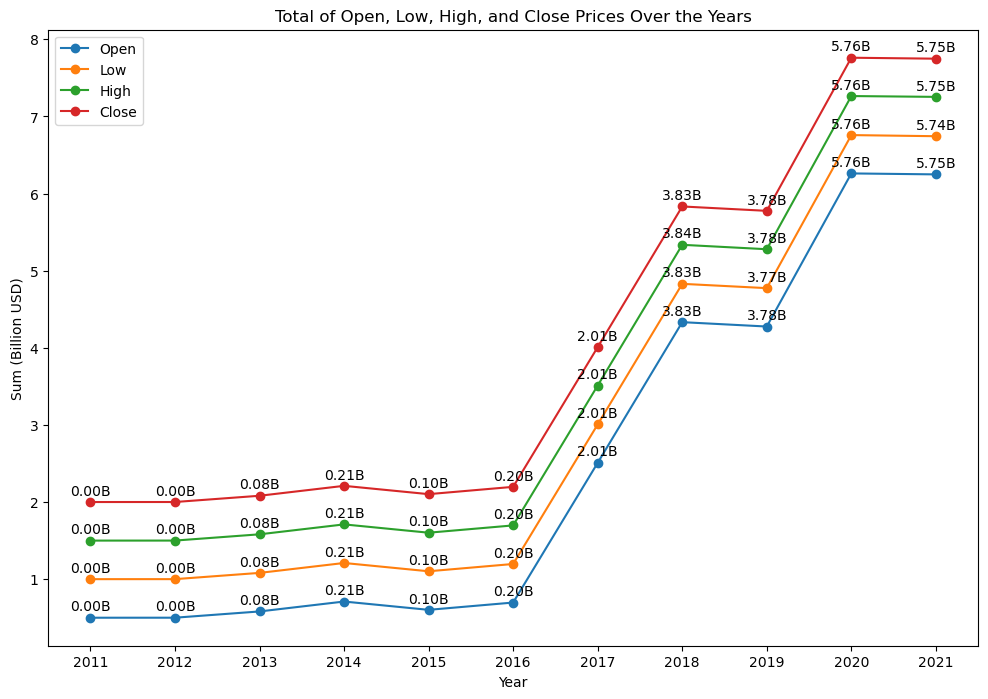

In [45]:
# Plotting the multi-spaced line chart with no grids
plt.figure(figsize=(12, 8))

# Adding some vertical spacing between the lines
spacing = 0.5

# Iterate through columns and plot each line separately
for column in ['Open', 'Low', 'High', 'Close']:
    plt.plot(sum_by_year['Year'], sum_by_year[column] / 1e9 + spacing * sum_by_year.columns.get_loc(column), marker='o', linestyle='-', label=column)

    # Adding labels to data points with exact values in billions
    for i, year in enumerate(sum_by_year['Year']):
        plt.annotate(f'{sum_by_year[column][i] / 1e9:.2f}B', (year, (sum_by_year[column][i] / 1e9) + spacing * sum_by_year.columns.get_loc(column)), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Total of Open, Low, High, and Close Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Sum (Billion USD)')
plt.xticks(sum_by_year['Year'])  # Set x-axis ticks to match the years
plt.legend()

### Obervation

Observation and Summary:

The provided data represents the summary statistics for Bitcoin price levels (Open, Low, High, and Close) for each year from 2011 to 2021. Here are key observations:

**Open Price:**

The Open price shows a significant increase over the years, starting from approximately $18 in 2011 and reaching over $5.7 billion in 2021.
There is a consistent upward trend, reflecting the overall growth and interest in Bitcoin during this period.

**Low Price:**

The Low price exhibits a similar trend to the Open price, indicating that even the lowest daily prices have increased substantially.
The Low price in 2011 was around $17.86, while in 2021, it reached approximately $5.74 billion.

**High Price:**

The High price reflects the highest daily trading price of Bitcoin, and it follows a consistent upward trajectory.
From around $17.93 in 2011, the High price surged to about $5.75 billion in 2021.

**Close Price:**

The Close price, representing the final trading price of the day, also shows a notable increase over the years.
Starting from $17.93 in 2011, the Close price reached approximately $5.75 billion in 2021.

**Overall Trend:**

The data suggests a remarkable long-term bullish trend in Bitcoin prices, with each year's metrics significantly surpassing the previous year.
The cryptocurrency market, as reflected in Bitcoin prices, has experienced substantial growth and attention over the analyzed period.

It's important to note that these figures represent the aggregated summary for each year and provide an overview of the broader trend in Bitcoin prices. Individual factors, market events, and external influences can contribute to fluctuations within each year. The data underscores the dynamic and evolving nature of the cryptocurrency market during the specified timeframe.

In [46]:
df_new.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,2011
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,2011
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,2011
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,2011
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,2012


In [47]:
# Save DataFrame to CSV without index
df_new.to_csv('historical_bitcoin_data.csv', index=False)

In [48]:
df_new.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
4857372,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00,2021
4857373,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00,2021
4857374,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00,2021
4857375,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00,2021
4857376,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363,2021-03-31 00:00:00,2021


In [49]:
df_new.size

32523921

In [50]:
# Assuming df is your DataFrame
row_count = len(df_new)

print(f"The DataFrame has {row_count} rows.")

The DataFrame has 3613769 rows.


In [51]:
# Save DataFrame to CSV without index
df_new.to_csv('historical_bitcoin_data.csv', index=False)